In [2]:
from src.data import load_karate_club, load_cora_dataset
from src.experiments import show_karate_gt_vs_prediction, report_metrics, draw_dot_plot, rearrange_tau, write_em_results, load_em_results
from src.em import em_algorithm

import networkx as nx
import numpy as np
import os
import time
from matplotlib import pyplot as plt

c:\Users\ezzeh\.julia\conda\3\lib\site-packages\graspologic\models\edge_swaps.py:215: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  _edge_swap_numba = nb.jit(_edge_swap, nopython=False)


In [3]:
%reload_ext autoreload
%autoreload 2

# Zachary's Karate Club dataset

In [3]:
X, y = load_karate_club()
G = nx.from_numpy_array(X)
Q = 2

Number of nodes: 34
Number of edges: 78


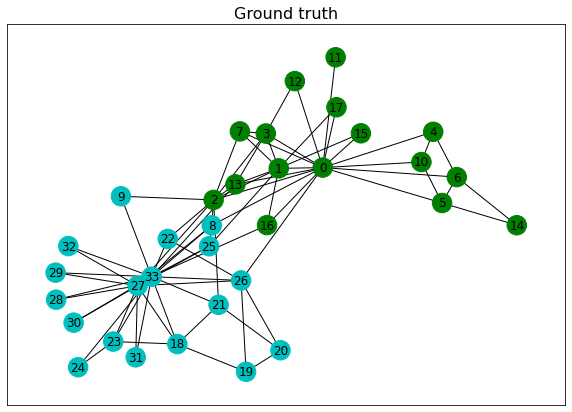

In [5]:
pos = nx.spring_layout(G, seed=42)
plt.rcParams['figure.facecolor'] = 'white'
plt.figure(figsize=(10, 7))
color_list = ["g", "c", "r"]
node_colors = [color_list[i] for i in y]
nx.draw_networkx(G, node_color=node_colors, pos=pos, node_size=380)
plt.title("Ground truth", fontsize=16)
plt.savefig("images/karate_club_gt")

In [6]:
alpha_pred, pi_pred, tau_pred, _ = em_algorithm(X, Q=Q, n_init=10, iterations=100, model="newman", implementation="pytorch")

EM iteration 100/100 | Max LL (1 paths) -469.879751


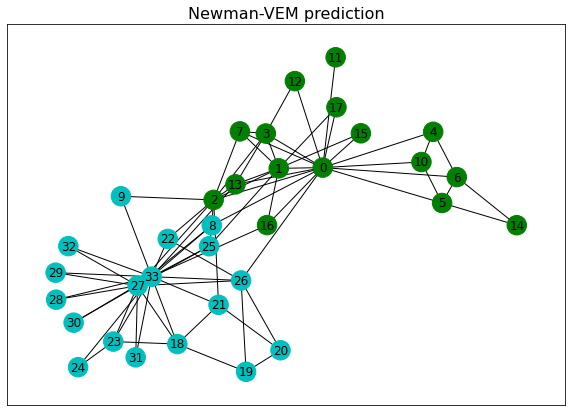

In [7]:
pos = nx.spring_layout(G, seed=42)
plt.rcParams['figure.facecolor'] = 'white'
plt.figure(figsize=(10, 7))
color_list = ["g", "c", "r"]
node_colors = [color_list[i] for i in np.argmax(tau_pred, axis=1)]
nx.draw_networkx(G, node_color=node_colors, pos=pos, node_size=380)
plt.title("Newman-VEM prediction", fontsize=16)
plt.savefig("images/karate_club_newman")

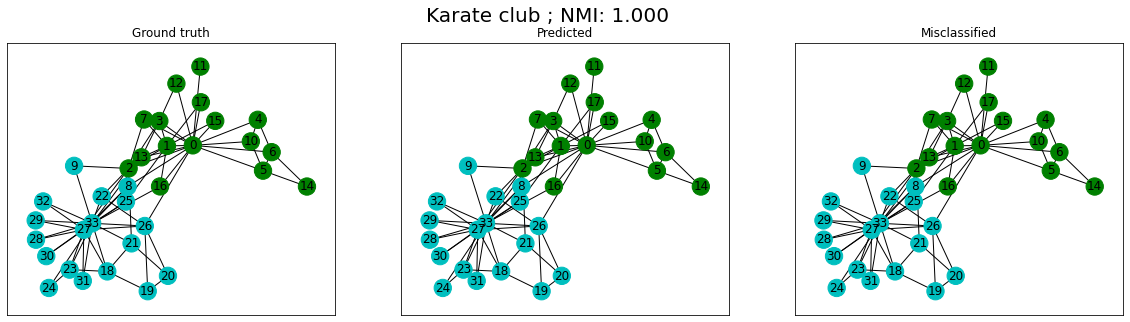

In [8]:
show_karate_gt_vs_prediction(G, tau_pred, y)

In [27]:
report_metrics(X, tau_pred, y, Q)

NMI: 1.000
Rand index: 1.000
Gt Modularity: 0.371
Pred Modularity: 0.371
Graph clustering coefficient: 0.2556818181818182
Per class gt clustering coefficients: [0.41899441340782123, 0.25961538461538464]
Per class pred clustering coefficients: [0.41899441340782123, 0.25961538461538464]


# Cora dataset

In [15]:
X, y = load_cora_dataset()
Q = 7

Number of nodes: 2708
Number of edges: 5278


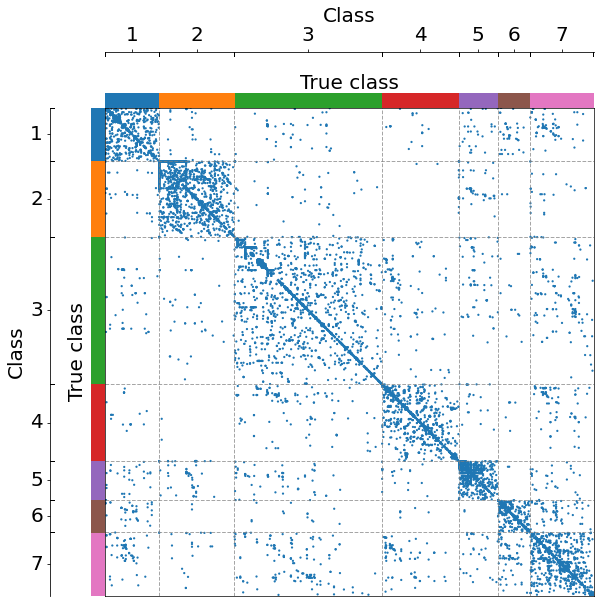

In [42]:
# Plot ground truth clustering
draw_dot_plot(X, y + 1, y + 1)

In [39]:
run_or_load = "load"
write = False

In [40]:
if run_or_load == "run":
    # Run EM algorithm
    t0 = time.time()
    alpha_pred, pi_pred, tau_pred, _ = em_algorithm(X, Q=Q, n_init=10, iterations=100, model="newman", implementation="pytorch")
    print("running time:", time.time() - t0)
    if write == True:
        write_em_results(alpha_pred, pi_pred, tau_pred, path=os.path.join('newman_EM', 'cora'))
else:
    # Load results
    alpha_pred, pi_pred, tau_pred = load_em_results(path=os.path.join('newman_EM', 'cora'))

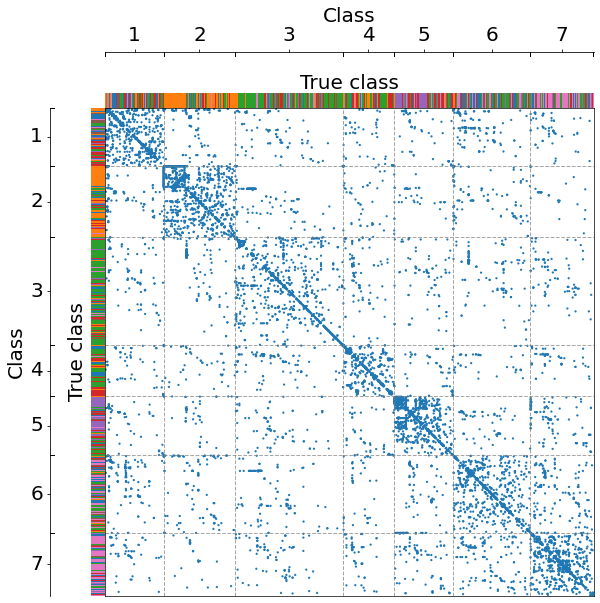

In [41]:
# Plot result
rearranged_tau_pred = rearrange_tau(tau_pred, y, Q=Q)
classification = rearranged_tau_pred.argmax(axis=1) + 1
draw_dot_plot(X, classification, y + 1, save_as="cora_Newman")

In [57]:
report_metrics(X, rearranged_tau_pred, y, Q)

NMI: 0.177
Rand index: 0.763
Gt Modularity: 0.640
Pred Modularity: 0.530
Graph clustering coefficient: 0.09349725626661058
Per class gt clustering coefficients: [0.18568665377176016, 0.05947263745428883, 0.12287887653598596, 0.2283628779979145, 0.10072090628218332, 0.22003577817531306, 0.1627731725697061]
Per class pred clustering coefficients: [0.2514705882352941, 0.06599123767798466, 0.16489556614144374, 0.2837624802942722, 0.11530748663101605, 0.28666224286662245, 0.18930868167202572]
